In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-diabetes/Healthcare-Diabetes.csv


### Loading Dataset

In [4]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('/kaggle/input/healthcare-diabetes/Healthcare-Diabetes.csv')

# Display the first few rows
print(dataset.head())


   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### Data Exploration

In [5]:
# displaying basic information about the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB
None


In [6]:
#  Displaying summary statistics
print(dataset.describe())

                Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000     3.742775   121.102601      69.134393      20.824422   
std     799.197097     3.323801    32.036508      19.231438      16.059596   
min       1.000000     0.000000     0.000000       0.000000       0.000000   
25%     692.750000     1.000000    99.000000      62.000000       0.000000   
50%    1384.500000     3.000000   117.000000      72.000000      23.000000   
75%    2076.250000     6.000000   141.000000      80.000000      32.000000   
max    2768.000000    17.000000   199.000000     122.000000     110.000000   

           Insulin          BMI  DiabetesPedigreeFunction          Age  \
count  2768.000000  2768.000000               2768.000000  2768.000000   
mean     80.127890    32.137392                  0.471193    33.132225   
std     112.301933     8.076127                  0.325669    11.777230   
m

In [7]:
# Checking for missing values
print(dataset.isnull().sum())

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Data Visualisation
Visualising data to uncover patterns and insights

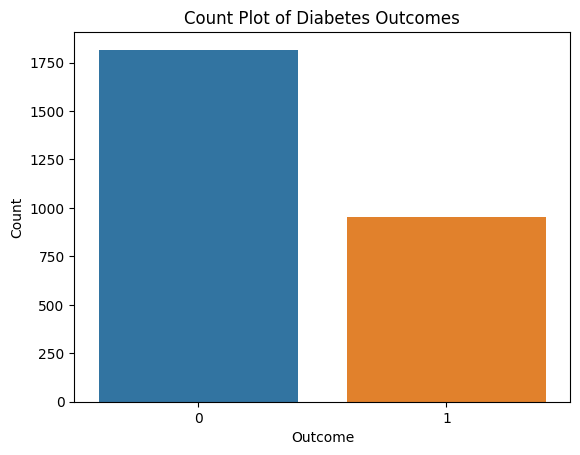

In [8]:
# Creating a count plot for the 'Outcome' variable
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Outcome', data=dataset)

# Add labels and title
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Count Plot of Diabetes Outcomes')

# Show the plot
plt.show()

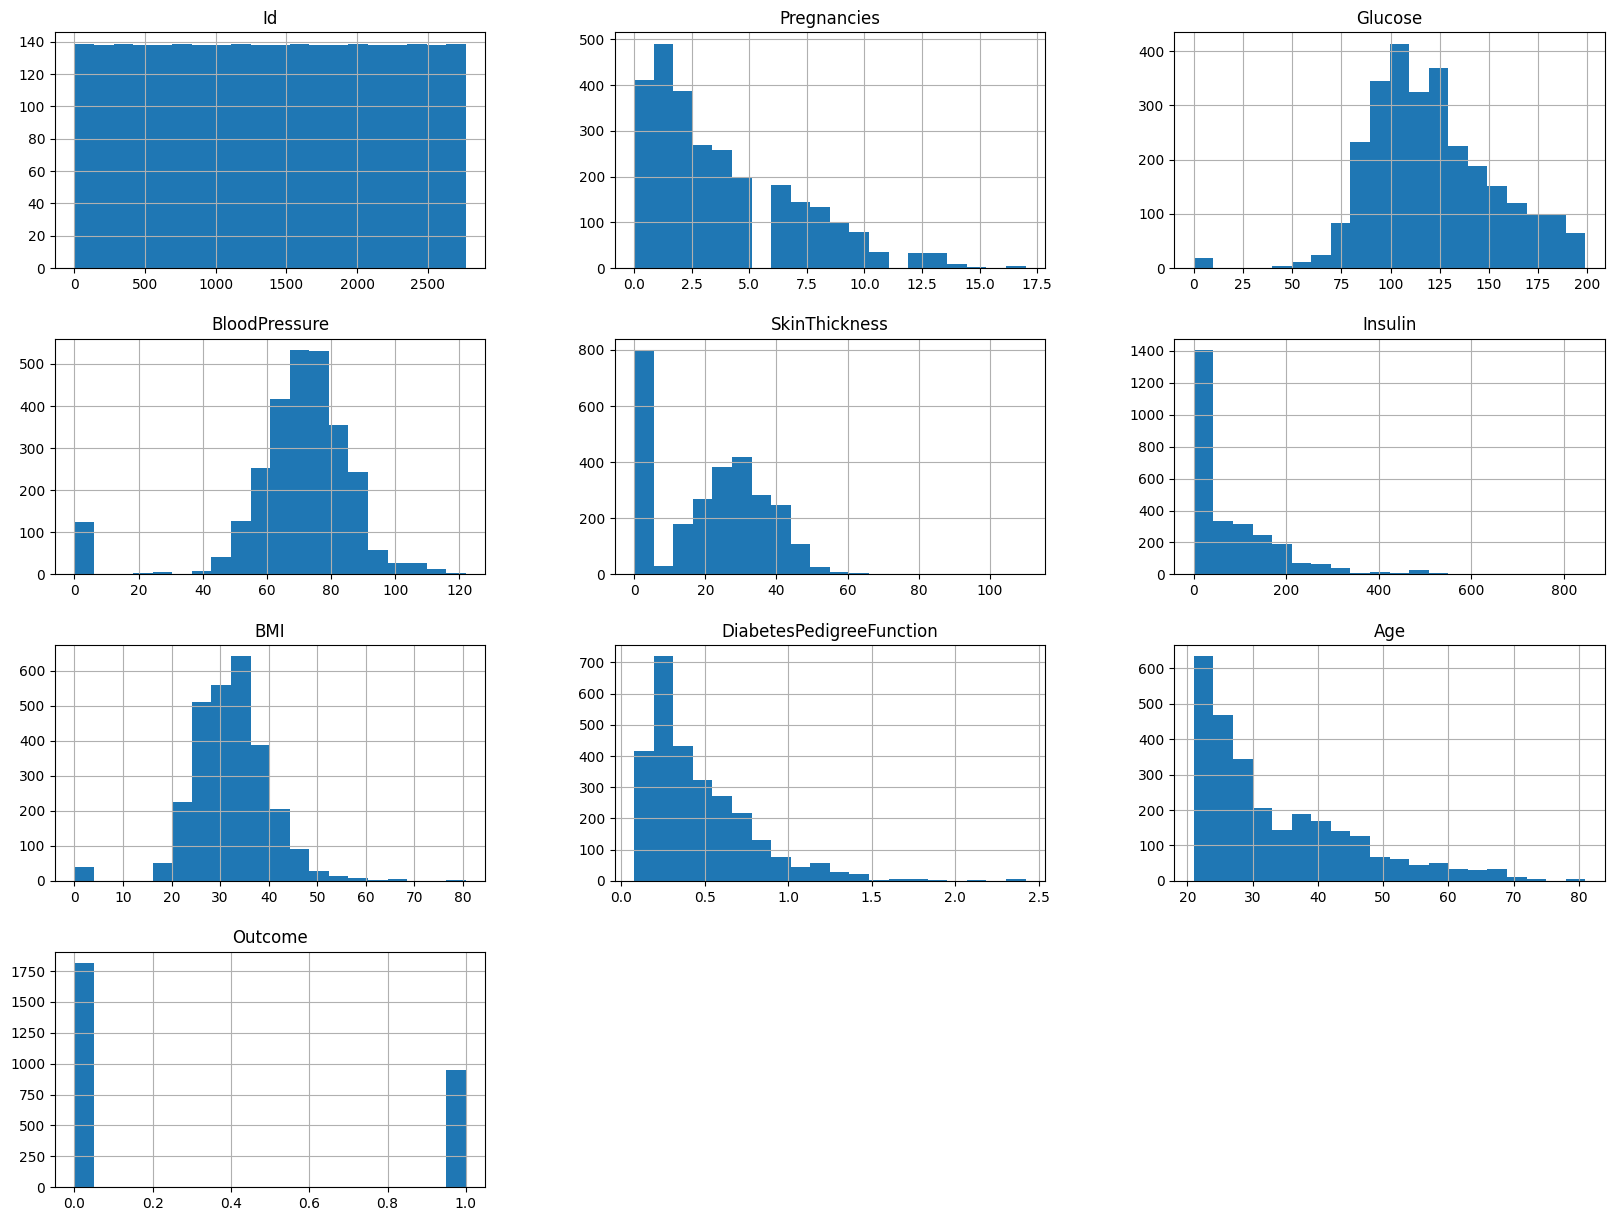

In [9]:
# Using Histogram of all features
import matplotlib.pyplot as plt
dataset.hist(bins=20, figsize=(20, 15))
plt.show()

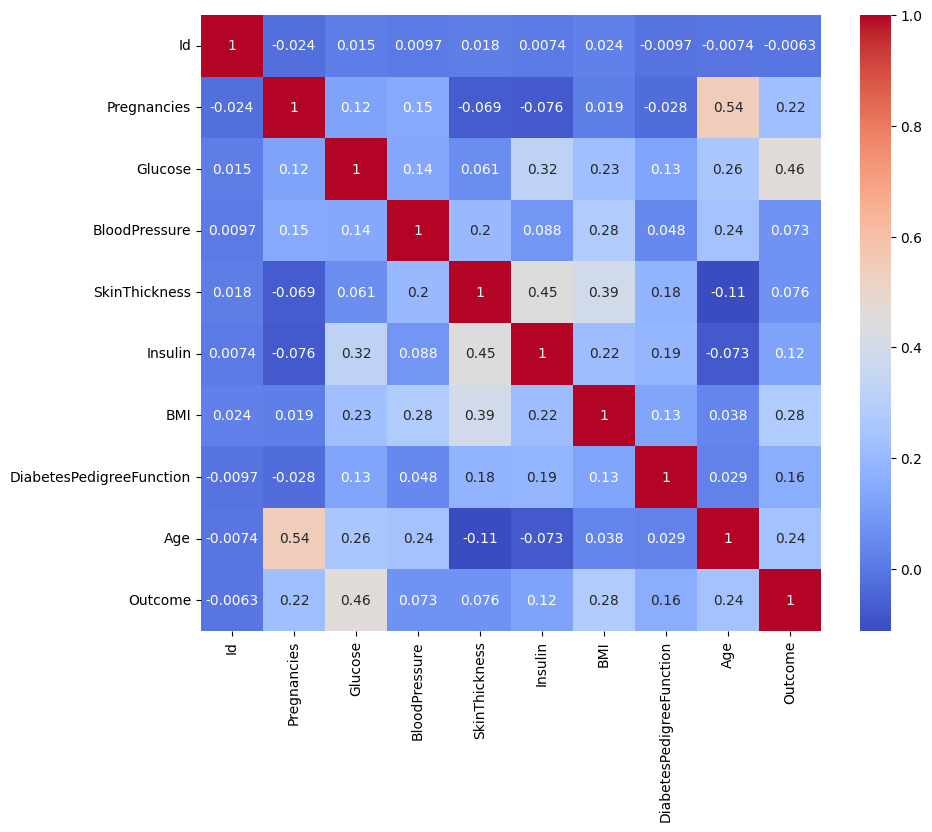

In [10]:
# Correlation heat map
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

### Data Preprocessing
preparing data for analysis and modelling

In [11]:
# Handling missing values
dataset.fillna(dataset.mean(), inplace=True)

In [12]:
# Feature scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(dataset.drop('Outcome', axis=1))

In [13]:
# Convert scaled data back to DataFrame
scaled_dataset = pd.DataFrame(scaled_dataset, columns=dataset.columns[:-1]) 
scaled_dataset['Outcome'] = dataset['Outcome']

### Model Building
Build and evaluate a machine learning model:

### Use of Random Forest Classifier

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
X = scaled_dataset.drop('Outcome', axis=1)
y = scaled_dataset['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[365   2]
 [  7 180]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.99      0.96      0.98       187

    accuracy                           0.98       554
   macro avg       0.99      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554



# Breakdown of results
Accuracy: 98% - This means that 98% of the predictions made by the model are correct.

## Precision:

Class 0: 98%

Class 1: 99%

Recall:

Class 0: 99%

Class 1: 96%

F1-Score:

Class 0: 99%

Class 1: 98%

## The confusion matrix shows that:

365 true negatives (correctly predicted as class 0)

180 true positives (correctly predicted as class 1)

2 false positives (incorrectly predicted as class 1)

7 false negatives (incorrectly predicted as class 0)

Overall, the model is doing a great job at predicting the outcomes

### Use of k-NN model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [16]:
# Initialize the k-NN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[323  44]
 [ 49 138]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       367
           1       0.76      0.74      0.75       187

    accuracy                           0.83       554
   macro avg       0.81      0.81      0.81       554
weighted avg       0.83      0.83      0.83       554



### plot decision boundaries of k-NN

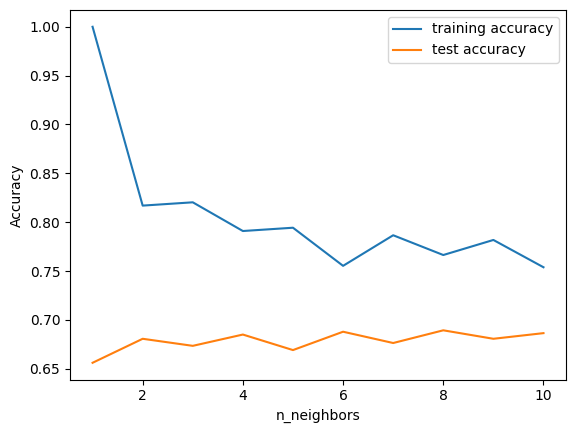

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.loc[:, dataset.columns != 'Outcome'], dataset['Outcome'], stratify=dataset['Outcome'], random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [19]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.78
Accuracy of K-NN classifier on test set: 0.68


### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[407  47]
 [103 135]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       454
           1       0.74      0.57      0.64       238

    accuracy                           0.78       692
   macro avg       0.77      0.73      0.74       692
weighted avg       0.78      0.78      0.78       692



In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
# Predict probabilities
y_prob = logreg.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)

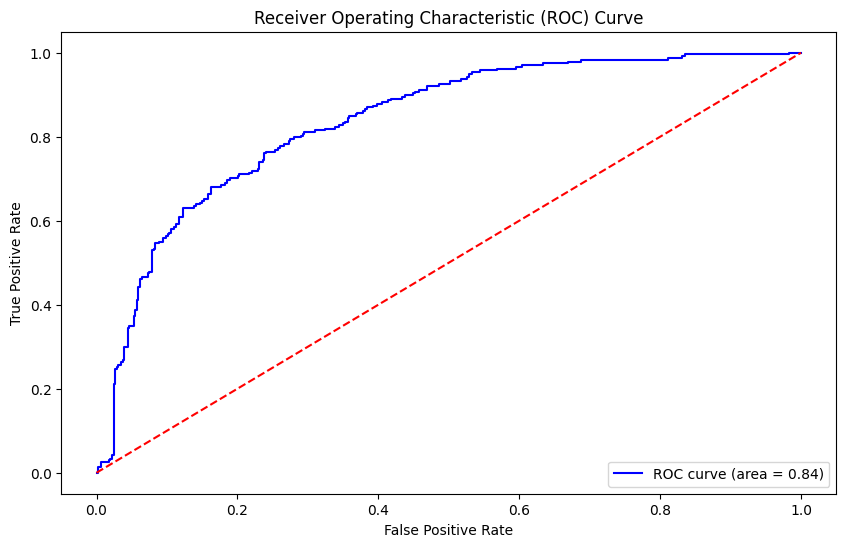

In [32]:
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Decision Tree

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [24]:
# Initialize the decision tree classifier
dtree = DecisionTreeClassifier(random_state=42)

# Train the model
dtree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [25]:
# Make predictions on the test set
y_pred = dtree.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[449   5]
 [  2 236]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       454
           1       0.98      0.99      0.99       238

    accuracy                           0.99       692
   macro avg       0.99      0.99      0.99       692
weighted avg       0.99      0.99      0.99       692



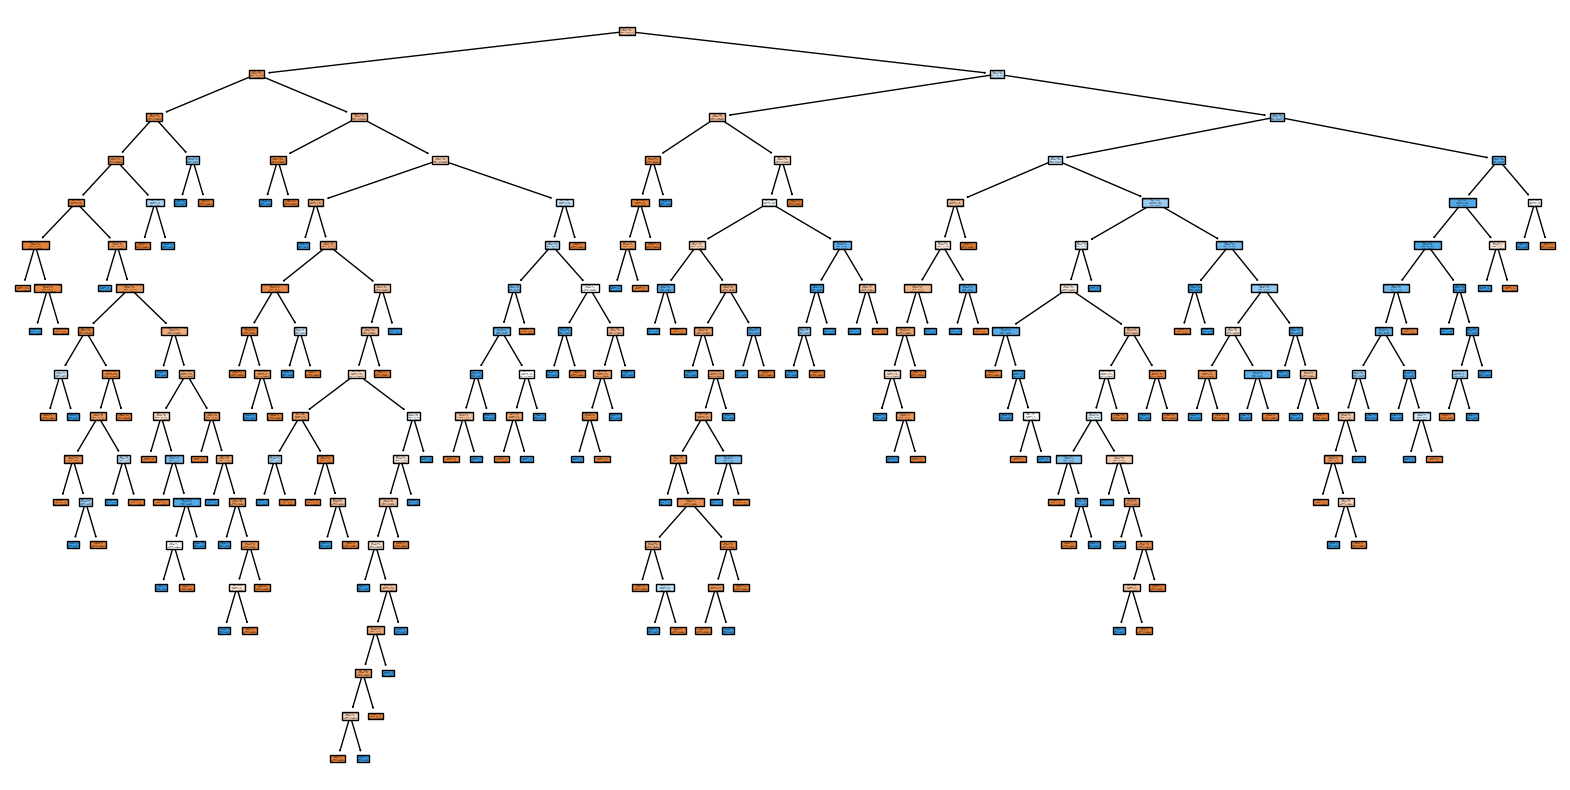

In [26]:
# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'])
plt.show()

Decision Tree accuracy is 99%